In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Question 3

Construct linear regression models to predict the quality of red and white wine from the chemical components that make them up.

**NB: This problem uses the data sets `red_wine_quality_data.csv` and `white_wine_quality_data.csv` posted on Blackboard** from [[Cortez et al., 2019](https://doi.org/10.1016/j.dss.2009.05.016)\]. Both data sets have $\mathbf{x} \in \mathbb{R}^{11}$ and $y \in \mathbb{R}$.

We show two ways to use the data files.

1. You can create a folder `./data/` in your local root folder (where your notebook file sits) or in your Colab runtime memory (or your local running directory), download the `.zip` data files, extract and upload them to the created folder.  

2. Use the following code to download the dataset automatically:

In [61]:
import os
import urllib.request
import zipfile

url = "https://github.com/HaozheTian/HaozheTian.github.io/raw/main/files/wine_quality.zip"
zip_path = os.path.join("data", "wine_quality.zip")
extract_dir = "data"
os.makedirs(extract_dir, exist_ok=True)
if not os.path.exists(zip_path):
    print("Downloading file...")
    urllib.request.urlretrieve(url, zip_path)
else:
    print("File already exists.")
 
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
 
print("Unzipping completed.")
!ls data

File already exists.
Unzipping completed.


'ls' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


Run the following to read the CSV data into numpy array format.

In [62]:
data_red_df = pd.read_csv(os.path.join('data', 'red_wine_quality_data.csv'))
data_white_df = pd.read_csv(os.path.join('data', 'white_wine_quality_data.csv'))
 
data_red = data_red_df.values[:, 1:].astype(np.float32)
data_white = data_white_df.values[:, 1:].astype(np.float32)
data_red, data_white

(array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
        [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
        [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
        ...,
        [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
        [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
        [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]],
       dtype=float32),
 array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
        [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
        [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
        ...,
        [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
        [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
        [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32))

### 3.a

1) Set numpy random seed = 1 by calling function `np.random.seed(1)`; 2) shuffle the data sets using shuffled index arrays created by using `np.random.permutation()`; 3) use `np.split()` to split the dataset with $\text{train}:\text{test} = 75\%:25\%$ (**Note that the split index should be rounded down, i.e. split at** `int(data.shape[0]*0.75)`, and 4) standardize the train and test sets respectively according to the mean and standard deviation of the train set. Show the first 5 samples of the data.

In [63]:
#random seed
np.random.seed(1)

shuffled_red = np.random.permutation(data_red.shape[0])
shuffled_data_red = data_red[shuffled_red]

shuffled_white = np.random.permutation(data_white.shape[0])
shuffled_data_white = data_white[shuffled_white]

# Split the dataset into  75% train and 25% test
split_index_red = int(data_red.shape[0] * 0.75)
train_data_red, test_data_red = np.split(shuffled_data_red, [split_index_red])

split_index_white = int(data_white.shape[0] * 0.75)
train_data_white, test_data_white = np.split(shuffled_data_white, [split_index_white])

# Standardize the train and test sets using the mean and std deviation of the train set
train_mean_red = np.mean(train_data_red, axis=0)
train_std_red = np.std(train_data_red, axis=0)

train_mean_white = np.mean(train_data_white, axis=0)
train_std_white = np.std(train_data_white, axis=0)

train_data_standardised_red = (train_data_red - train_mean_red) / train_std_red
test_data_standardised_red = (test_data_red - train_mean_red) / train_std_red

train_data_standardised_white = (train_data_white - train_mean_white) / train_std_white
test_data_standardised_white = (test_data_white - train_mean_white) / train_std_white

# Show the first 5 samples of the standardized train and test sets
print("First 5 samples of the standardized red wine train set:")
print(train_data_standardised_red[:5])

print("\nFirst 5 samples of the standardized red wine test set:")
print(test_data_standardised_red[:5])

print("First 5 samples of the standardized white wine train set:")
print(train_data_standardised_white[:5])

print("\nFirst 5 samples of the standardized white wine test set:")
print(test_data_standardised_white[:5])


First 5 samples of the standardized red wine train set:
[[ 2.73679793e-01 -6.47397101e-01  1.90278172e+00 -2.32793927e-01
   9.29286405e-02 -6.61055803e-01 -1.40008688e-01  9.90108013e-01
   1.53518116e+00 -2.86873808e-04  8.49838927e-02 -7.91603684e-01]
 [ 2.15704307e-01  5.88009834e-01  4.74530049e-02  1.41911924e-01
   1.52544096e-01  1.02349825e-01  6.82064652e-01  3.20565671e-01
  -3.02617311e-01 -1.73830703e-01 -1.94800079e-01  4.49093223e-01]
 [ 1.20128357e+00 -1.04048109e+00  1.59356022e+00  8.91323626e-01
   1.70254648e+00 -9.47332919e-01 -9.31634903e-01  1.39869392e-01
  -7.62066543e-01  2.31104434e-01  8.31074178e-01  4.49093223e-01]
 [-7.11899817e-01 -3.66622716e-01 -3.64842266e-01 -4.57617491e-01
  -2.25020647e-01  1.15203261e+00  2.25357234e-01 -6.04073584e-01
   4.19374287e-01 -1.15982868e-01 -8.27772636e-03  4.49093223e-01]
 [-7.11899817e-01 -7.59706855e-01 -7.77137518e-01 -3.07735205e-01
  -4.63482618e-01 -1.83927283e-01 -6.88057601e-01 -2.24076080e+00
  -4.00749147e-0

### 3.b

Use ```sklearn``` to fit a linear regression model to each training set. Interpret the model by showing which variables matter the most for predicting the quality of red wind. Do the same for white wine.

In [64]:

# Red wine model
X_train_red = train_data_standardised_red[:, :-1]
y_train_red = train_data_standardised_red[:, -1]  

model_red = LinearRegression()
model_red.fit(X_train_red, y_train_red)

#Extract feature names
feature_names = data_red_df.columns[1:-1]  

#Calculate coefficient of red wine
coefficients_red = model_red.coef_

print("\nRed wine feature importance:")
feature_importance_red = sorted(zip(feature_names, coefficients_red), key=lambda x: abs(x[1]), reverse=True)
for feature, coef in feature_importance_red:
    print(f"{feature}: Coefficient = {coef}")

# Rank top 5 most important features for red wine
print("\nTop 5 most important features for red wine:")
for i, (feature, coef) in enumerate(feature_importance_red[:5]):
    print(f"Rank {i + 1}: {feature} with Coefficient = {coef}")

# White wine model
X_train_white = train_data_standardised_white[:, :-1]
y_train_white = train_data_standardised_white[:, -1]  

model_white = LinearRegression()
model_white.fit(X_train_white, y_train_white)

# Calculate coefficient of white wine
coefficients_white = model_white.coef_

print("\nWhite wine feature importance:")
feature_importance_white = sorted(zip(feature_names, coefficients_white), key=lambda x: abs(x[1]), reverse=True)
for feature, coef in feature_importance_white:
    print(f"{feature}: coefficient = {coef}")

# Rank top 5 most important features for white wine
print("\nTop 5 most important features for white wine:")
for i, (feature, coef) in enumerate(feature_importance_white[:5]):
    print(f"Rank {i + 1}: {feature} with coefficient = {coef}")




Red wine feature importance:
alcohol: Coefficient = 0.38422253727912903
volatile acidity: Coefficient = -0.2206846922636032
sulphates: Coefficient = 0.19233685731887817
total sulfur dioxide: Coefficient = -0.12523053586483002
chlorides: Coefficient = -0.1059265211224556
fixed acidity: Coefficient = 0.06350285559892654
residual sugar: Coefficient = 0.05991474166512489
density: Coefficient = -0.05047979578375816
pH: Coefficient = -0.05019408464431763
free sulfur dioxide: Coefficient = 0.04759173095226288
citric acid: Coefficient = -0.042795028537511826

Top 5 most important features for red wine:
Rank 1: alcohol with Coefficient = 0.38422253727912903
Rank 2: volatile acidity with Coefficient = -0.2206846922636032
Rank 3: sulphates with Coefficient = 0.19233685731887817
Rank 4: total sulfur dioxide with Coefficient = -0.12523053586483002
Rank 5: chlorides with Coefficient = -0.1059265211224556

White wine feature importance:
density: coefficient = -0.5057458281517029
residual sugar: coef

Write your answer to which variables are most important here...

In [65]:
# the most important variables of red wine are alcohol, volatile acidity, sulphates, total sulfur dioxide, chlorides. The most important for white wine are density, residual sugar, alcohol, volatle acidity, and pH.

## Question 4

You are provided with the following dataset:

\begin{array}{c|c}
    x & y \\
    \hline
    2 & 0.2 \\
    2.5 & 0.46 \\
    3 & 1.28 \\
    3.5 & 1.31 \\
    4 & 2.71 \\
    4.5 & 7 \\
    5 & 8.64 \\
    5.5 & 14.76 \\
    6 & 26.85 \\
\end{array}

### 4.a

Plot this dataset, and you will see that a linear regression model will not be a good model for this case. Then plot the dataset set of $(x, \ln(y))$, and you can see that it is close to a linear relationship.

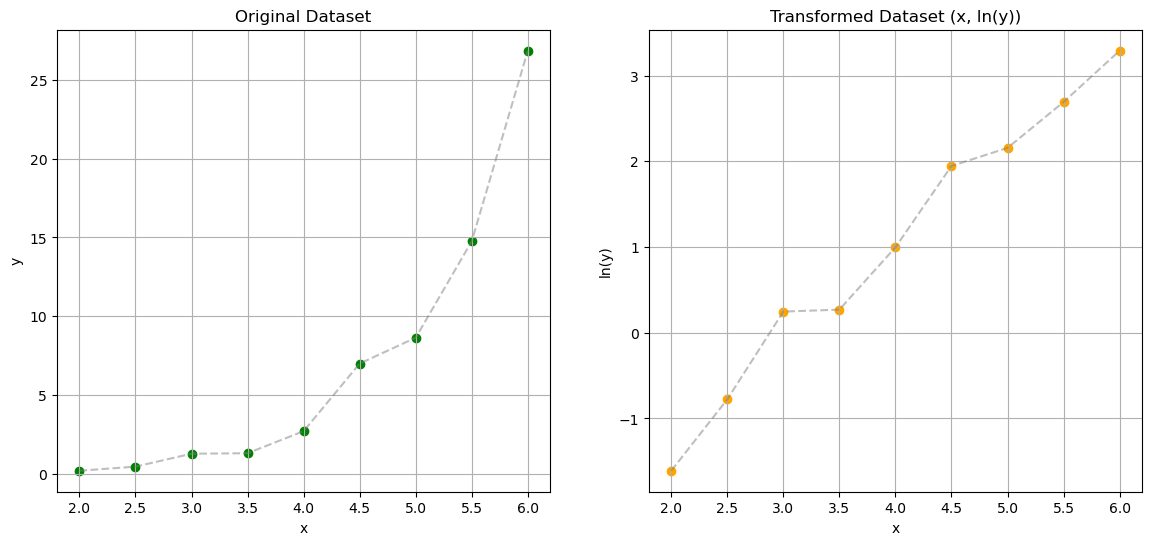

In [66]:
# Import numpy as np
import matplotlib.pyplot as plt

# Dataset constructed from the picture  
x = np.array([2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
y = np.array([0.2, 0.46, 1.28, 1.31, 2.71, 7, 8.64, 14.76, 26.85])

# Plotting the original dataset
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, y, color='green')
plt.plot(x, y, linestyle='--', color='gray', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Dataset')
plt.grid(True)

# From y to ln(y)
y_ln = np.log(y)

# Plotting the transformed dataset
plt.subplot(1, 2, 2)
plt.scatter(x, y_ln, color='orange')
plt.plot(x, y_ln, linestyle='--', color='gray', alpha=0.5)
plt.xlabel('x')
plt.ylabel('ln(y)')
plt.title('Transformed Dataset (x, ln(y))')
plt.grid(True)


plt.show()

### 4.b

Find the linear coefficients $\mathbf{\beta}$ that fit the dataset $(x, \ln(y))$.

**Note: obtain the analytical solution for this problem.** You can use `numpy` to calculate matrix inverse.

In [67]:
# Creating the design matrix X and the transformed y 
X = np.vstack((np.ones(len(x)), x)).T
y_ln = np.log(y)

# Calculating the coefficients using matrices
X_transpose = X.T
beta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y_ln

# Printing betas
beta_0 = beta[0]
beta_1 = beta[1]
print(f"beta0 = {beta_0:.4f}, beta1 = {beta_1:.4f}")

beta0 = -3.7096, beta1 = 1.1833


### 4. c

Convert your linear model into the nonlinear form $y = a \cdot b^x$ by performing algebraic manipulations in your model from part (b).

<font color='red'>Double click to write equation here (change $a$ and $b$ to appropriate values)</font>

$$
y=0.0245\cdot 3.2651^x
$$

In [68]:
#The linear model is trained for ln(y) = b0+b1x, to convert to exponential form, both sides are exponentiated
# so y = e^beta_0 + e^beta_1x, so a  = e^beta_0, b = e^beta_1

a = np.exp(beta_0)
b = np.exp(beta_1)

# Printing a and b
a, b

(0.024486800331617736, 3.2651457201287095)